In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm

local


In [2]:
%%time
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

CPU times: user 534 ms, sys: 102 ms, total: 636 ms
Wall time: 1.86 s


(1099, 1)

{'main': CompoundNamed(comment='.signal.main')}


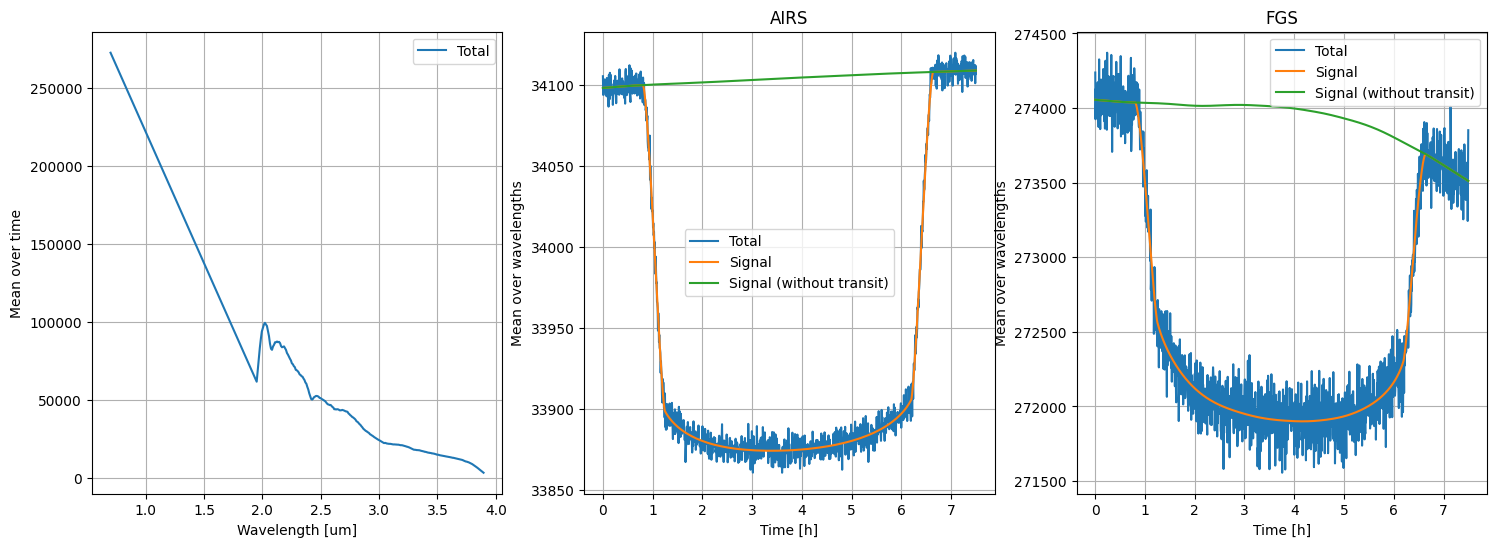

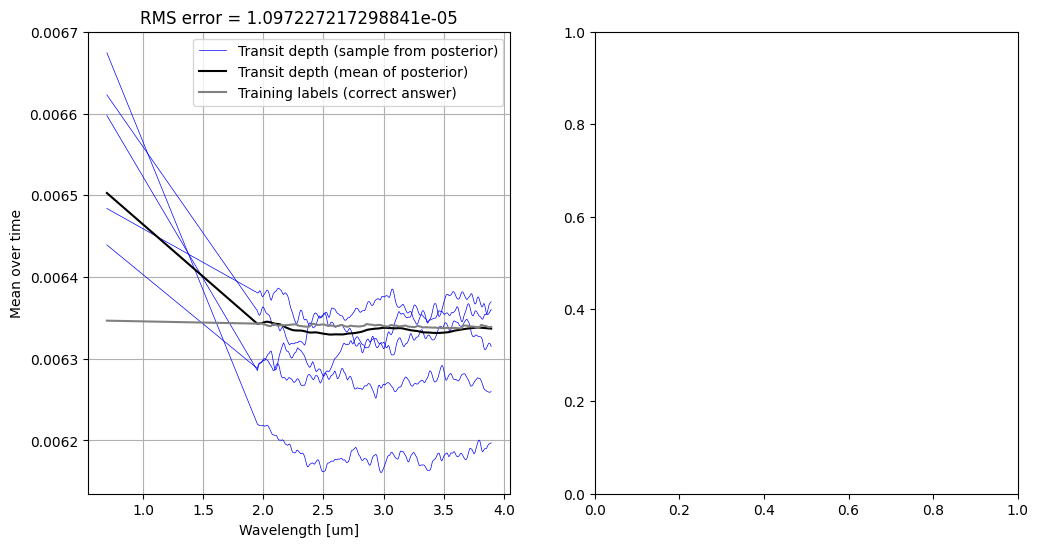

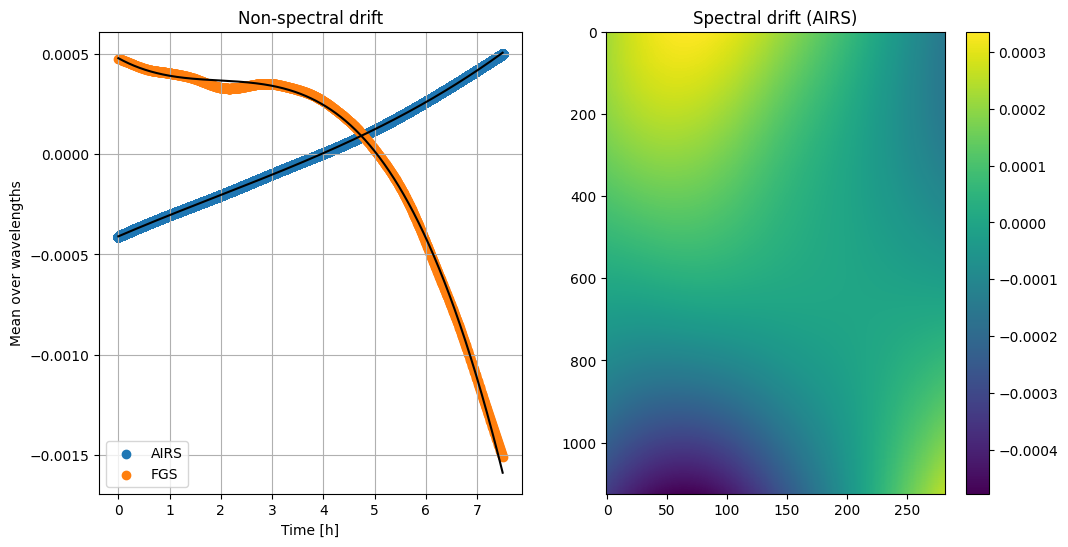

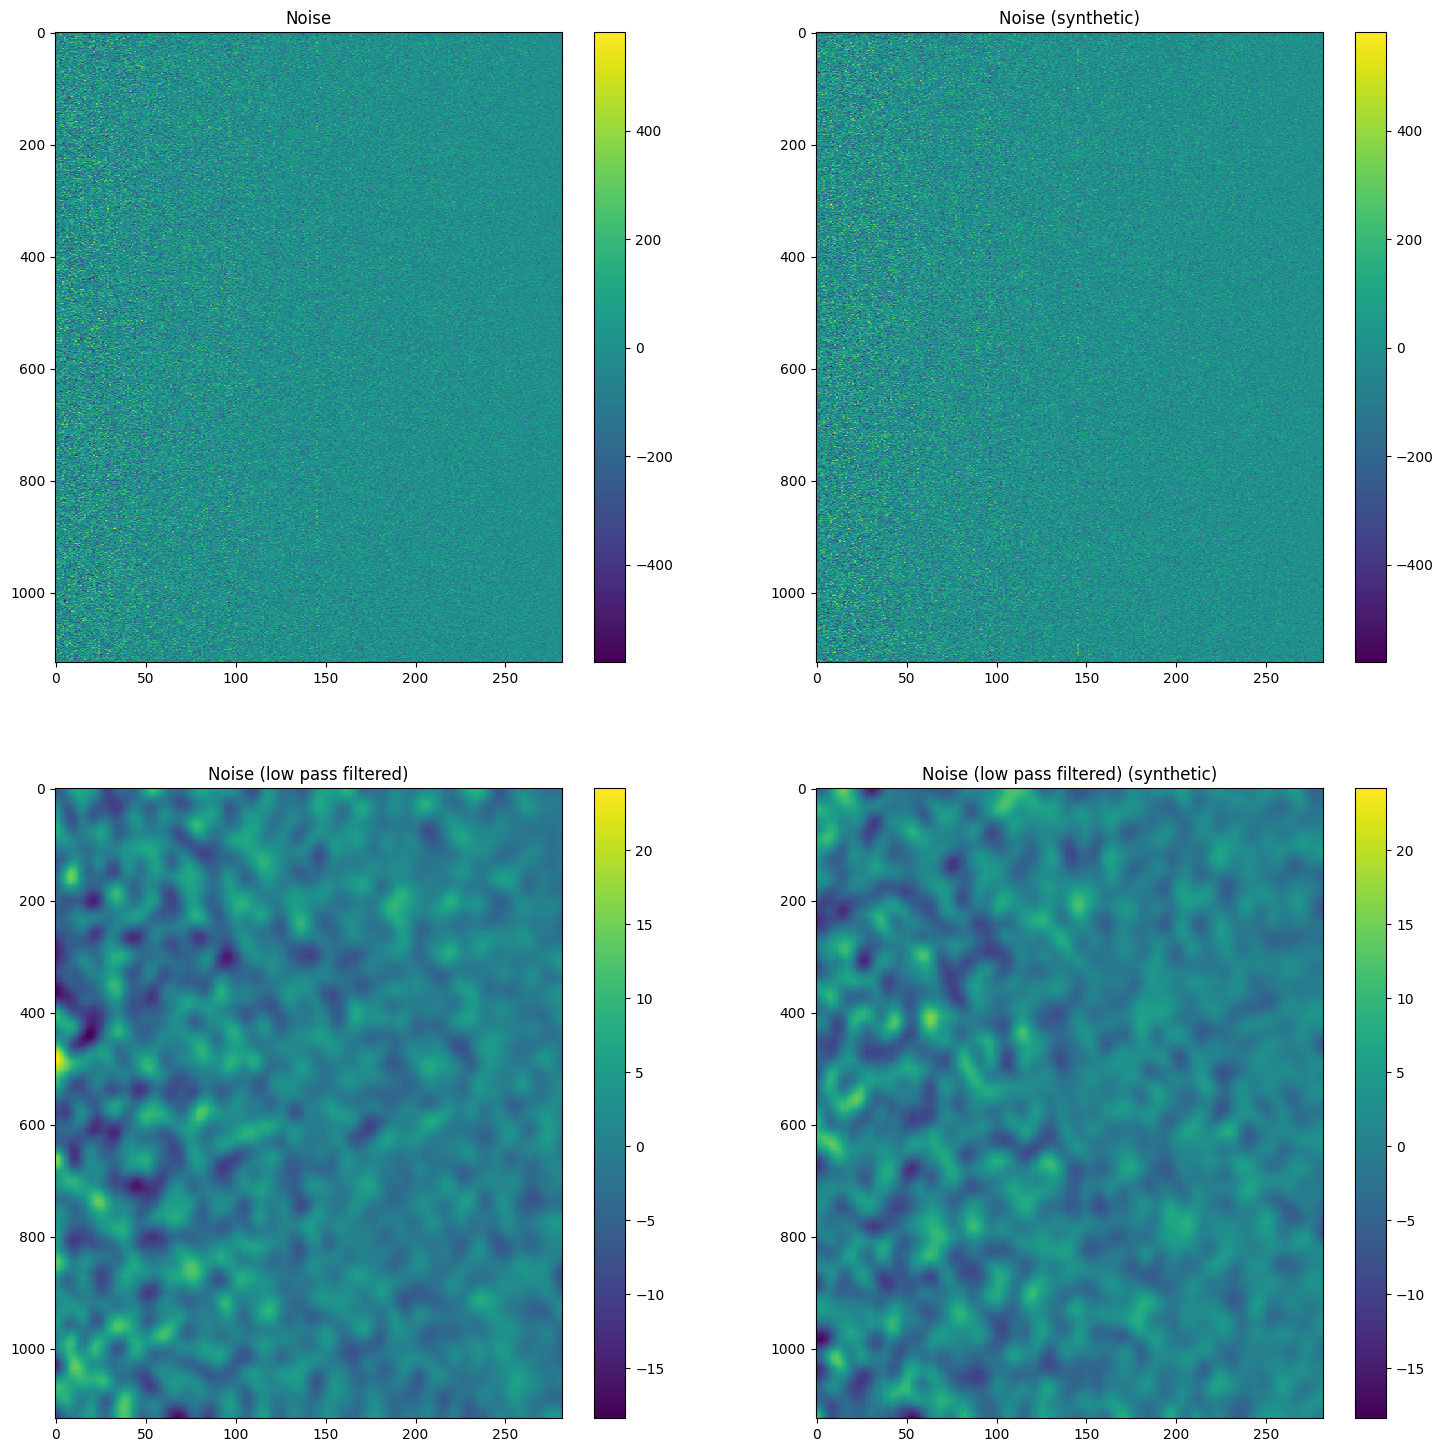

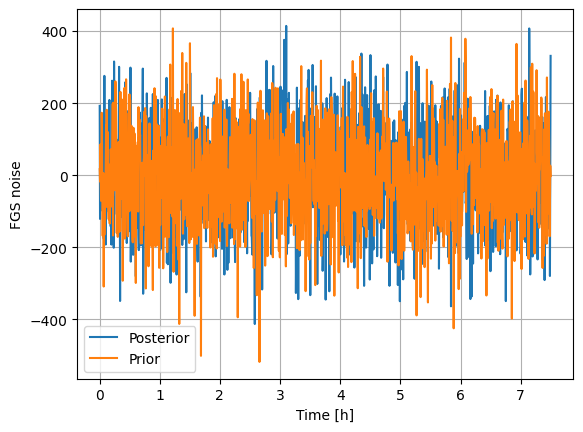

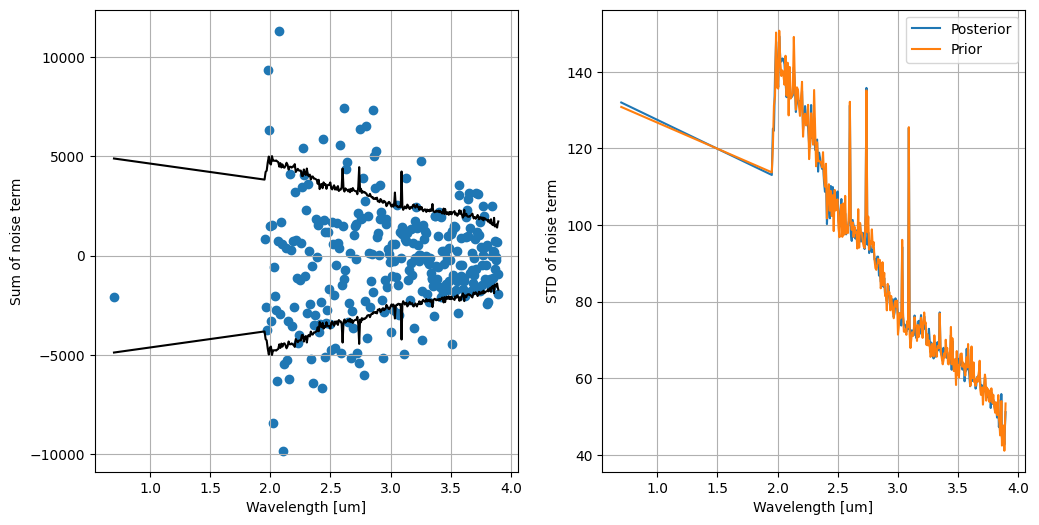

Score:          2.4394
RMS error FGS:  156.19 ppm
RMS error AIRS: 5.86 ppm
Score:          3.7007
RMS error FGS:  164.88 ppm
RMS error AIRS: 8.03 ppm
CPU times: user 39.1 s, sys: 9.22 s, total: 48.3 s
Wall time: 47.8 s


(3.700737160904689, 0.00016487946274112292, 8.03311417558549e-06)

In [5]:
%%time
import gp
import ariel_gp
kgs.profiling=False
kgs.debugging_mode=1
importlib.reload(gp)
importlib.reload(ariel_gp)
model = ariel_gp.PredictionModel()  
model.run_in_parallel=False
model.model_options.n_iter = 7
model.model_options.use_training_labels = False
model.starter_model.do_plots = False
model.plot_final = True
model.plot_simple = False
model.model_options.include_background = False
model.train(train_data)
#model.starter_model.loaders[0].cache_steps = [5]

for ii in range(2):                
    pass
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca = True                 
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[3] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[2] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[4] = True
    model.loaders[ii].apply_pixel_corrections.mask_hot = False
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
#model.loaders[1].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[1] = 1
model.loaders[0].cache_steps = [5]
model.starter_model.loaders = model.loaders
            
#model.loaders[0].cache_steps = [5]
data = [train_data[[d.planet_id for d in train_data].index(1843015807)]] # ingress and egress obscured
data = train_data[1:2]
for d in data:
    d.load_to_step(0,model.loaders)
inferred_data = model.infer(data)
kgs.score_metric(inferred_data, data)
model.starter_model.do_plots = False
inferred_data_simple = model.starter_model.infer(data)
kgs.score_metric(inferred_data_simple, data)

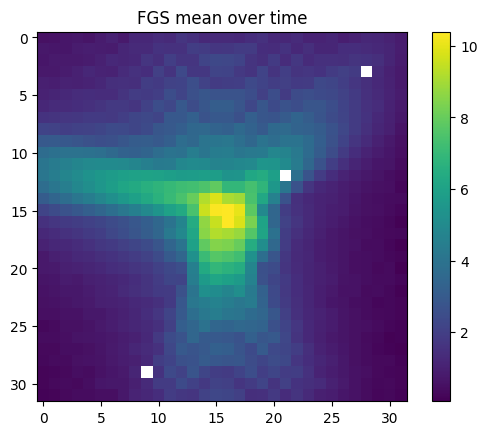

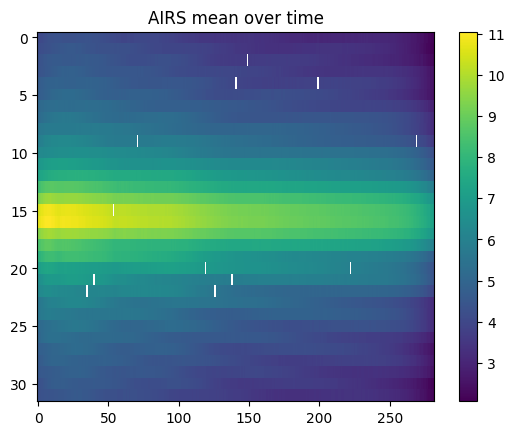

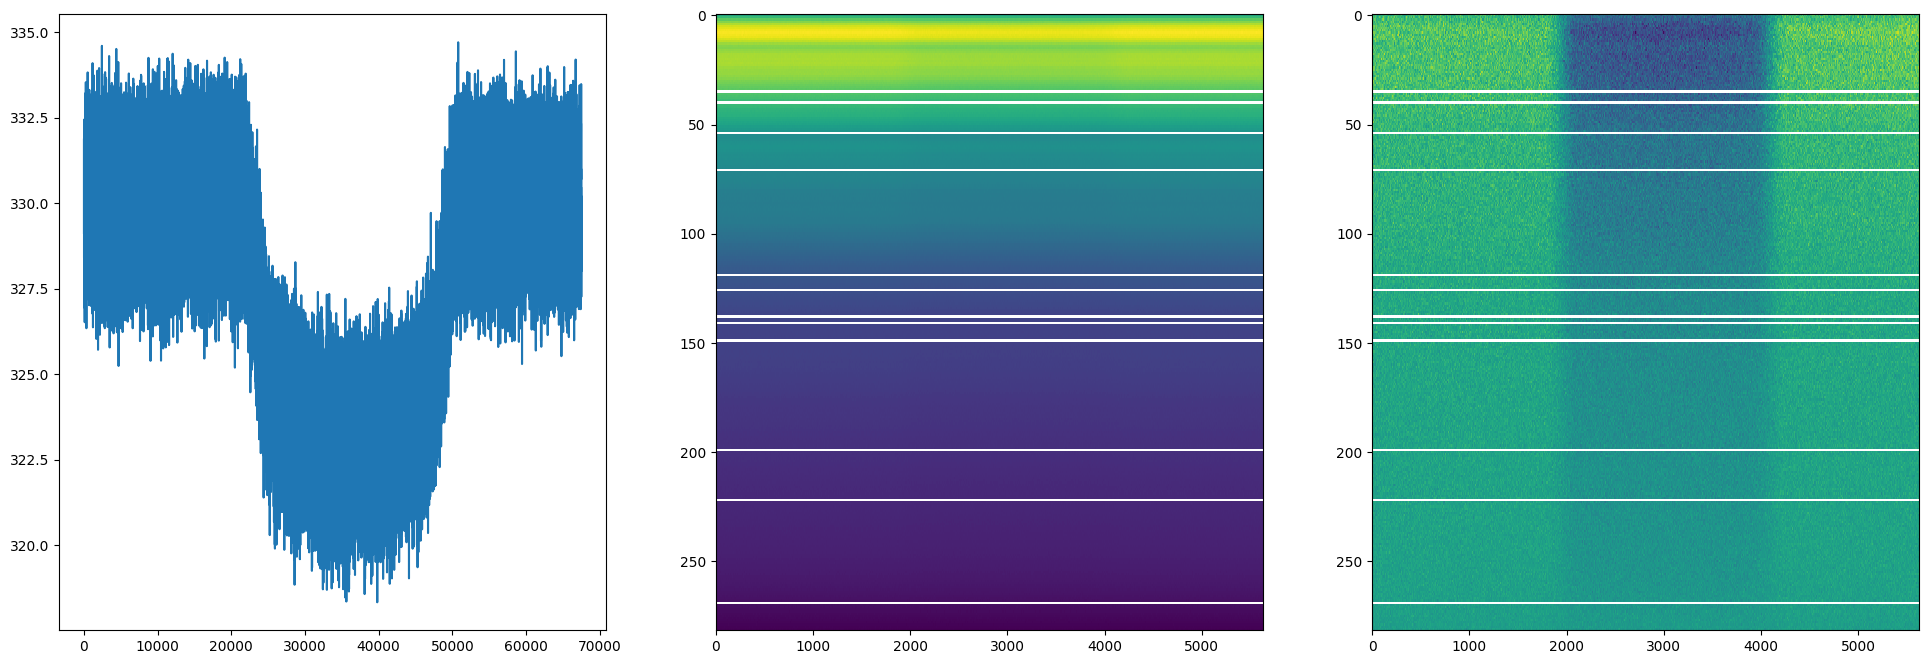

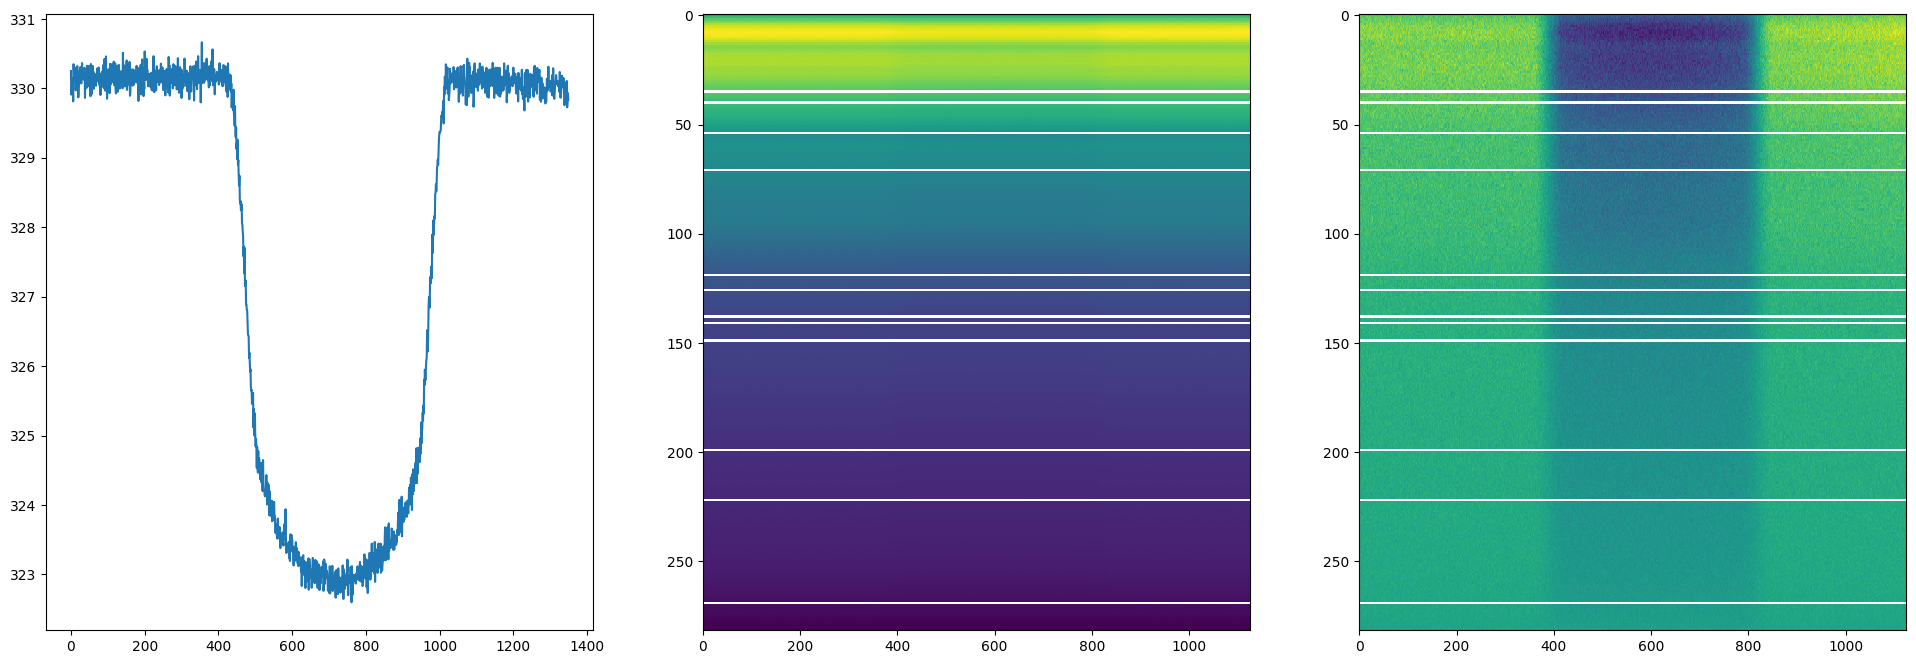

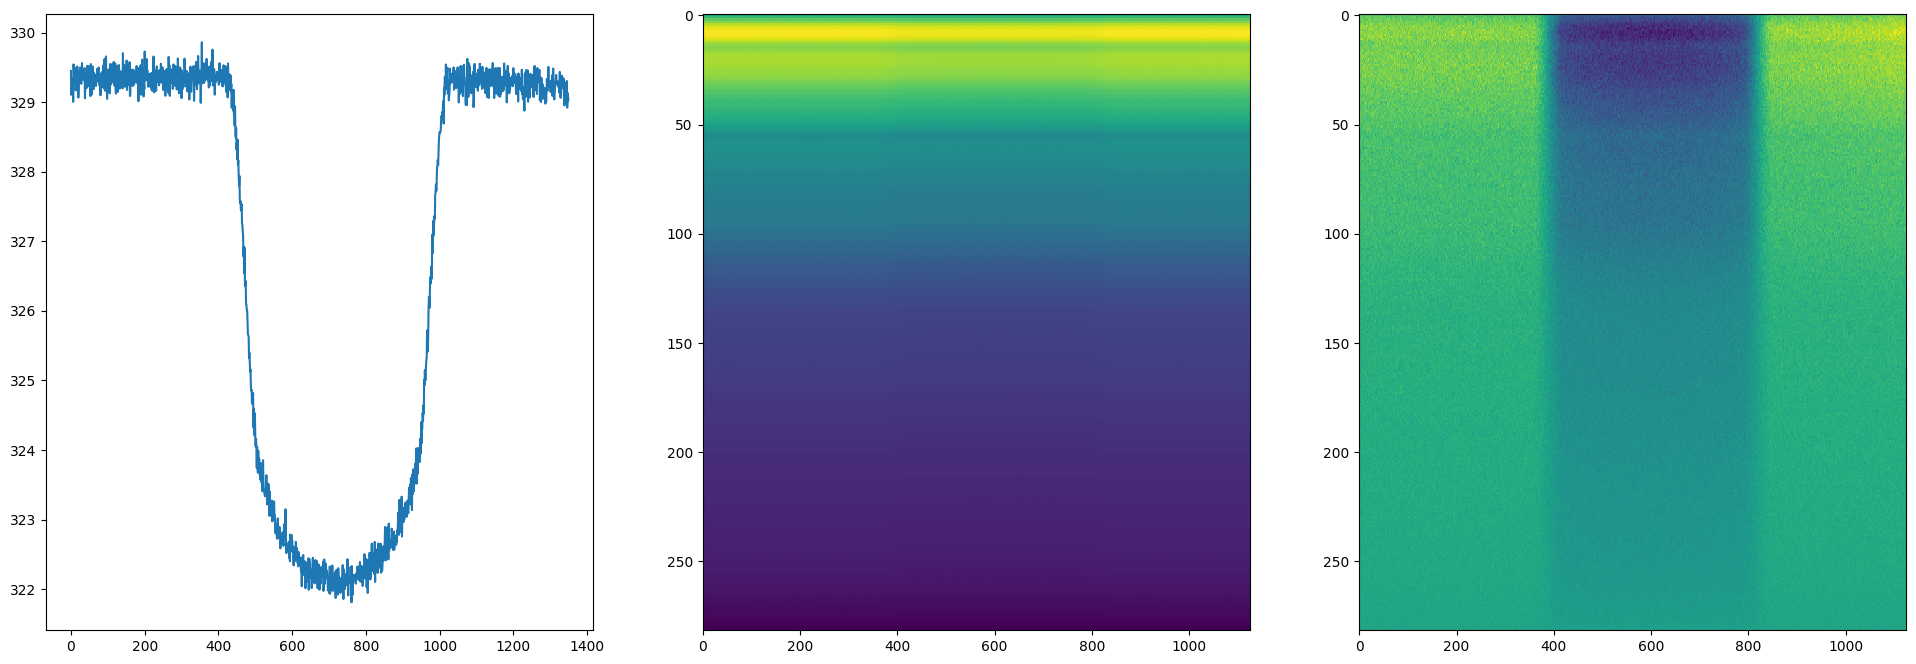

In [4]:
importlib.reload(ariel_load)
ariel_load.raw_data_diagnostics(train_data[0],0,model.loaders)